In [2]:
import ast
a_file = open("Resp_BCNN.txt", "r")
# a_file = open("Gibbon_panda.txt", "r")
# a_file = open("Gimagenet_Test_2.txt", "r")


string_without_line_breaks = ""
for line in a_file:
    stripped_line = line.rstrip()
    string_without_line_breaks += stripped_line

import re
dict_Classes = ast.literal_eval(re.search('({.+})', string_without_line_breaks).group(0))

# for key, value in dict_Classes.items():
#     print ('classId', key)
#     print ('value', value)
a_file.close()
#print(dict_Classes)

In [3]:
import ast
dogs_file = open("Dogs_Labels.txt", "r")
# a_file = open("Gibbon_panda.txt", "r")
# a_file = open("Gimagenet_Test_2.txt", "r")
listDogs =[]
for line in dogs_file:
    listDogs.append(line) 
# for line in dogs_file:
#     listDogs+=re.findall(r'\bn0\w+', line)

for syn in listDogs:
    print('synset:', syn)
dogs_file.close()

synset: Afghan_hound

synset: African_hunting_dog

synset: Airedale

synset: American_Staffordshire_terrier

synset: Appenzeller

synset: Australian_terrier

synset: Bedlington_terrier

synset: Bernese_mountain_dog

synset: Blenheim_spaniel

synset: Border_collie

synset: Border_terrier

synset: Boston_bull

synset: Bouvier_des_Flandres

synset: Brabancon_griffon

synset: Brittany_spaniel

synset: Cardigan

synset: Chesapeake_Bay_retriever

synset: Chihuahua

synset: Dandie_Dinmont

synset: Doberman

synset: English_foxhound

synset: English_setter

synset: English_springer

synset: EntleBucher

synset: Eskimo_dog

synset: French_bulldog

synset: German_shepherd

synset: German_short-haired_pointer

synset: Gordon_setter

synset: Great_Dane

synset: Great_Pyrenees

synset: Greater_Swiss_Mountain_dog

synset: Ibizan_hound

synset: Irish_setter

synset: Irish_terrier

synset: Irish_water_spaniel

synset: Irish_wolfhound

synset: Italian_greyhound

synset: Japanese_spaniel

synset: Kerry_

# Computing the similarity between classes; pearson or cosine distances might be used

In [21]:
from scipy.spatial import distance
import collections


import numpy as np
from keras import backend as K
import os
import scipy as sp

import matplotlib.pyplot as plt
import networkx as nx

# G = nx.Graph()
G = nx.Graph()
# draw_graph(G)
# thresh = 0.5
thresh = 10
# print(' length dict', len(dict_Classes))
class_index =0
adjacency_Matrix = []
for key, value in dict_Classes.items():
    list_of_close_nodes = []
    list_of_close_nodes_names = []
    list_of_close_nodes_sim = []
    simil_dict = {}
    listDogsLabels =[]

#         list_of_close_nodes_sim.append(100)
    start_trans_sim = 100 #big value
#         print ('key: ',key )
    class_index +=1
    dogs_file = open("Dogs_Labels.txt", "r")
#         for line in dogs_file:                        
#             if(key in line):
#                 stringToSplitAfter = key + " : "
#     #                     dogLabel = line.split(stringToSplitAfter ,1)[2]
#     #                     print("string split:", stringToSplitAfter)
#     #                     dogLabel += line.partition(stringToSplitAfter)[1]
#                 #listDogsLabels+=re.findall(r'\b: \w+', line)
#                 print("Top similar dogs to", line.partition(stringToSplitAfter)[2],)
#                 break;
# #         print('currentindex', class_index)
    weights_dic_Conv2_13= {}
    weights_dic_Conv2_13.update(value)
    weights_dic_Conv2_13 = sorted (weights_dic_Conv2_13.items ())
    odList = []
    od = collections.OrderedDict(weights_dic_Conv2_13)
    for i in range(len(od)):
        if weights_dic_Conv2_13[i][1][0] >0:
            odList.append(weights_dic_Conv2_13[i][1][0]) 
        else:
            odList.append(0)
    arry_by_object =[]
    for key2, value2 in dict_Classes.items():
        if (key != key2):
            weights_dic_Conv2_13_2= {}
    #         print ('Key:', key)
    #         if key != key2 : #classs_Id 
            weights_dic_Conv2_13_2.update(value2)
            weights_dic_Conv2_13_2 = sorted (weights_dic_Conv2_13_2.items ())
    #         sorted (weights_dic_Conv2_13, key=lambda kv: kv[1], reverse=True)
    #         sorted (weights_dic_Conv2_13_2, key=lambda kv: kv[1], reverse=True)

            totalProb = 0
            totalProb2 = 0
            totalSimilarity = 0

            for i in range(len(weights_dic_Conv2_13)):
            #     print('value:', weights_dic_Conv2_13_Umb1[i][0])
                if weights_dic_Conv2_13[i][1][0] > 0:
                    totalProb =  totalProb + weights_dic_Conv2_13[i][1][0]
    #             print('tot prob1', totalProb)
#                 else:
#                     weights_dic_Conv2_13[i][1][0] = 0

            for i in range(len(weights_dic_Conv2_13_2)):
            #     print('value:', weights_dic_Conv2_13_Umb1[i][0])
                if weights_dic_Conv2_13_2[i][1][0] > 0:
                    totalProb2 =  totalProb2 + weights_dic_Conv2_13_2[i][1][0]
    #         print('total prob2', totalProb2)
#                 else:
#                     weights_dic_Conv2_13[i][1][0] = 0            
            od2 = collections.OrderedDict(weights_dic_Conv2_13_2)
            # ### Product
            # for i in range(len(od)):
            #     totalSimilarity += od[i][0] * od2[i][0]
            #### Distance
            od2List = []
            for i in range(len(od)):
                if weights_dic_Conv2_13_2[i][1][0] >0:
                    od2List.append(weights_dic_Conv2_13_2[i][1][0])
                else:
                    od2List.append(0)
#             totalSimilarity = distance.cosine(odList, od2List) # One edge value
            if totalProb>0 and totalProb2>0:
#                 for i in range(len(od)):
#                     totalSimilarity += abs((odList[i]/totalProb) - (od2List[i]/totalProb2))

    ################## pearson correlation
                from scipy.stats import pearsonr
                totalSimilarity, _ = pearsonr(odList, od2List)
    #                 print('Pearsons correlation: %.3f' % corr)
    ################# perason correlation
            if(totalSimilarity <= thresh):
#                     print('total sim between '+ key+ 'and '+ key2+ ':', totalSimilarity)                
                G.add_edge(key, key2, weight=round(totalSimilarity, 6), name = 'weight', title=round(totalSimilarity, 6))
#                     list_of_close_nodes.append(0,key2)
#                     list_of_close_nodes_sim.append(0,totalSimilarity)
                if weights_dic_Conv2_13_2[0][1][0] != 0:
                    simil_dict[key2]= totalSimilarity 
#     simil_dict = sorted(simil_dict.items(), key=lambda item: item[1])
    simil_dict = sorted(simil_dict.items(), key=lambda item: item[1], reverse=True)

#         dogs_file = open("list_imgnet_labels.txt", "r")
    if len(simil_dict)>0 :
        print("Top similar dogs to", key)
        for i in range (3):            
#             print('sim value %.3f' % simil_dict[i][1])
            with open("Dogs_Labels.txt", 'r') as read_obj:
                for line in read_obj:
                    if(simil_dict[i][0] in line):
                        print(simil_dict[i][1])
                        listDogsLabels.append(simil_dict[i][0])
                        break;
        for i in range(len(listDogsLabels)):
             print( i+1, ". ", listDogsLabels[i])
        print("---------------------------------------------")

Top similar dogs to Chihuahua
0.49914829741728395
0.4827244817342849
0.4568190320855755
1 .  Brabancon_griffon
2 .  French_bulldog
3 .  Boston_bull
---------------------------------------------
Top similar dogs to Japanese_spaniel
0.46202901125543444
0.3985697134595726
0.38351956047846336
1 .  Shih-Tzu
2 .  Tibetan_terrier
3 .  Pekinese
---------------------------------------------
Top similar dogs to Maltese_dog
0.6631901022306151
0.45773336241082596
0.438914142627998
1 .  Great_Pyrenees
2 .  soft-coated_wheaten_terrier
3 .  Labrador_retriever
---------------------------------------------
Top similar dogs to Pekinese
0.5186432312213787
0.5005362575477281
0.4586128925670905
1 .  Shih-Tzu
2 .  Brabancon_griffon
3 .  Pomeranian
---------------------------------------------
Top similar dogs to Shih-Tzu
0.5186432312213787
0.5098661226396068
0.3958071255395395
1 .  Pekinese
2 .  Brabancon_griffon
3 .  affenpinscher
---------------------------------------------
Top similar dogs to Blenheim_s

Top similar dogs to Australian_terrier
0.582433700268327
0.4474621147731674
1 .  groenendael
2 .  American_Staffordshire_terrier
---------------------------------------------
Top similar dogs to Dandie_Dinmont
0.39340883036087937
0.3457380175936355
0.2989216733133563
1 .  otterhound
2 .  Irish_wolfhound
3 .  Leonberg
---------------------------------------------
Top similar dogs to Boston_bull
0.6642156418121536
0.4568190320855755
0.4519791114646641
1 .  Bernese_mountain_dog
2 .  Chihuahua
3 .  English_foxhound
---------------------------------------------
Top similar dogs to miniature_schnauzer
0.35051606022576204
0.3449315168767809
0.2682421059281969
1 .  Lakeland_terrier
2 .  Pembroke
3 .  kelpie
---------------------------------------------
Top similar dogs to giant_schnauzer
0.4946316163608229
0.487503584476614
0.48006545629291075
1 .  bull_mastiff
2 .  Sussex_spaniel
3 .  flat-coated_retriever
---------------------------------------------
Top similar dogs to standard_schnauzer
0.

Top similar dogs to Doberman
0.38275235978881467
0.32703564052816714
0.32525303678523837
1 .  Shetland_sheepdog
2 .  Appenzeller
3 .  Rhodesian_ridgeback
---------------------------------------------
Top similar dogs to miniature_pinscher
0.46260714855124757
0.32788252801677203
0.3140044822972199
1 .  Appenzeller
2 .  Pembroke
3 .  toy_terrier
---------------------------------------------
Top similar dogs to Greater_Swiss_Mountain_dog
0.5675183410738803
0.43592507765674243
0.40953114741667956
1 .  Bernese_mountain_dog
2 .  English_foxhound
3 .  Boston_bull
---------------------------------------------
Top similar dogs to Bernese_mountain_dog
0.6642156418121536
0.5499331960980364
0.3675031176216431
1 .  Boston_bull
2 .  English_foxhound
3 .  Blenheim_spaniel
---------------------------------------------
Top similar dogs to Appenzeller
0.5167436761978765
0.4958305074416999
0.46260714855124757
1 .  English_foxhound
2 .  beagle
3 .  miniature_pinscher
--------------------------------------

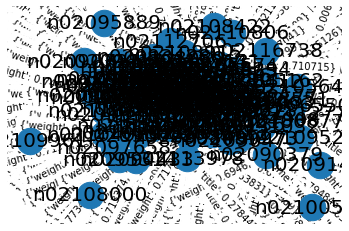

In [44]:
import matplotlib.pyplot as plt
import networkx as nx

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.9]
# esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
# edge_labels = nx.get_edge_attributes(G, 'name')
# nx.draw_networkx_edge_labels(G, pos, labels=edge_labels)
nx.draw_networkx_edge_labels(G, pos, edgelist=elarge, width=3)

# nx.draw_networkx_edges(G, pos, edgelist=elarge, width=3)
#delete edges with low similaaities
# nx.draw_networkx_edges(
#     G, pos, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed"
# ) 


# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

plt.axis("off")
plt.show()

In [5]:
from pyvis.network import Network
net = Network(notebook= True)
# load the network graph
net.from_nx(G)
net.show("exampDogsClasses0_8.html")